In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [3]:
df = pd.read_csv('tmdb_5000_movies.csv')

In [4]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [69]:
df.shape

(4803, 21)

In [9]:
# Retrieve first row of data to explore dataset

x = df.iloc[0]
x

budget                                                          237000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                     150.437577
production_companies    [{"name": "Ingenious Film Partners", "id": 289...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                               

In [6]:
# json formatted string - we are interested in the name of the genre

x['genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [7]:
# Keywords is also a list of json documents

x['keywords']

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [8]:
# Convert json object into a python list of python dictionaries (so that is can be used in python)

j = json.loads(x['genres'])
j

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [10]:
# Convert json into a single line of text (required by the tfidf vectorizer)

' '.join(''.join(jj['name'].split()) for jj in j)     # Join genres into a single token separated by one space

'Action Adventure Fantasy ScienceFiction'

In [11]:
# Convert relevant data for each movie into a single string 
# to be ingested by TFidfVectorizer

def genres_and_keywords_to_string(row):   # Define function that takes one of the rows of our df as input
    genres = json.loads(row['genres'])    # create list of dictionaries of json object
    genres = ' '.join(''.join(j['name'].split()) for j in genres)    # join genres into single string - repeat for keywords
    
    keywords = json.loads(x['keywords'])
    keywords = ' '.join(''.join(j['name'].split()) for j in keywords)
    
    return "%s %s" % (genres, keywords)   # Concatenat results into a single string

In [12]:
# Create string representation of each movie and save in a new column

df['string'] = df.apply(genres_and_keywords_to_string, axis = 1)

In [32]:
# Create tf-idf vectorizer object

tfidf = TfidfVectorizer(max_features=2000)    # We limit number of column in final matrix to 2000 - keep the most frequent terms in the corups

In [33]:
# Create a data matrix from the overviews 

X = tfidf.fit_transform(df['string'])    # No need for train and test set - model will be trained based on the. information we have

In [34]:
X

<4803x40 sparse matrix of type '<class 'numpy.float64'>'
	with 112129 stored elements in Compressed Sparse Row format>

In [35]:
# Generate a mapping from movie title -> index from df - to be able to idetify the right movie in the td-idf matrix

movie2idx = pd.Series(df.index, index = df['title'])   # Create dataframe that has movie title as the index and index as the first column
movie2idx

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [55]:
# Find the index for movie 'Scream 3'

idx = movie2idx['Scream 3']
idx

1164

In [56]:
# Grab the correct row in our matrix using the index variable

query = X[idx]      # The tf-idf vector corresponding to 'Scream 3'
query

<1x40 sparse matrix of type '<class 'numpy.float64'>'
	with 23 stored elements in Compressed Sparse Row format>

In [57]:
# print the query vector

query.toarray()

array([[0.14988951, 0.        , 0.        , 0.14988951, 0.14988951,
        0.        , 0.14988951, 0.14988951, 0.14988951, 0.        ,
        0.        , 0.14988951, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.14988951, 0.14988951, 0.        ,
        0.48315016, 0.14988951, 0.14988951, 0.14988951, 0.        ,
        0.54291964, 0.14988951, 0.14988951, 0.        , 0.14988951,
        0.14988951, 0.14988951, 0.14988951, 0.14988951, 0.14988951,
        0.        , 0.14988951, 0.        , 0.        , 0.        ]])

In [58]:
# Compute similarity between query and every vector in X

scores = cosine_similarity(query, X)

In [59]:
# Currently the array is 1 x N, make it just a 1-D array

scores = scores.flatten()

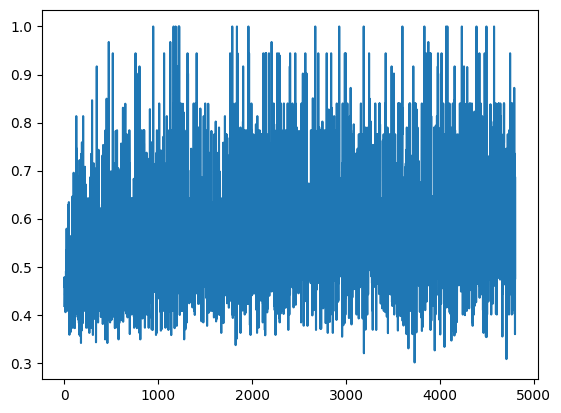

In [60]:
plt.plot(scores);

In [61]:
(-scores).argsort()

array([ 947, 4496, 1186, ..., 3191, 4709, 3731])

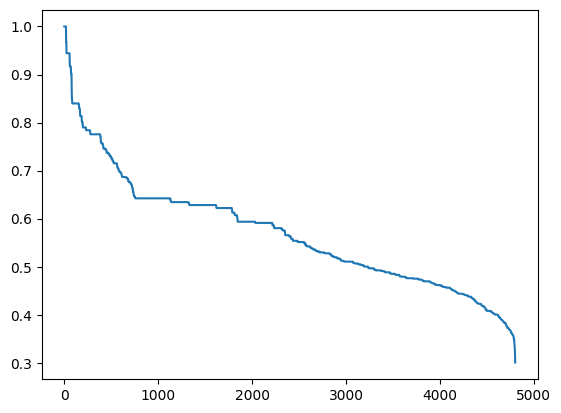

In [62]:
plt.plot(scores[(-scores).argsort()]);

In [65]:
# Get top 5 matches
# Exclude self (similarity between query and itself yields max score)

recommended_idx = (-scores).argsort()[1:6]

In [66]:
# Convert indices back to titles 

df['title'].iloc[recommended_idx]

947                 Silent Hill
4496    The Blair Witch Project
1186      The Final Destination
4577        Paranormal Activity
1164                   Scream 3
4080               Silent House
Name: title, dtype: object

In [78]:
# Create function to generate reconmmendations

def recommend(title):
    # get the row in the dataframe for this movie
    idx = movie2idx[title]
    if type(idx) == pd.Series:
        idx = idx.iloc[0]
        
    # Calculate the pairwise similarities for this movie
    query = X[idx]
    scores = cosine_similarity(query, X)
    
    # Currently the array is 1 x N, make just a 1-D array
    scores = scores.flatten()
    
    # Get the indexes of the highest scoring movies
    # Get the first K recommendations
    # exclude the movie itself from the return
    recommended_idx = (-scores).argsort()[1:6]
    
    return df['title'].iloc[recommended_idx]
    

In [79]:
print("Reommendations for 'Scream 3':")
print(recommend('Scream 3'))

Reommendations for 'Scream 3':
4496    The Blair Witch Project
1186      The Final Destination
4577        Paranormal Activity
1164                   Scream 3
4080               Silent House
Name: title, dtype: object


In [75]:
print("Reommendations for 'Avatar':")
print(recommend('Avatar'))

Reommendations for 'Avatar':
46                     X-Men: Days of Future Past
3494    Beastmaster 2: Through the Portal of Time
870                                   Superman II
61                              Jupiter Ascending
813                                      Superman
Name: title, dtype: object


In [80]:
print("Reommendations for 'Mortal Kombat':")
print(recommend('Mortal Kombat'))

Reommendations for 'Mortal Kombat':
3607    The Beastmaster
4654                Ink
1359             Batman
159          Spider-Man
668             Elektra
Name: title, dtype: object
